Prophet - không có biến ngoại sinh


========== Prophet (không có exogenous) cho nồng độ: 250500 ==========


18:11:48 - cmdstanpy - INFO - Chain [1] start processing
18:11:49 - cmdstanpy - INFO - Chain [1] done processing


R^2: -0.1277
MAE: 0.7192
MAPE: 511.84%
RMSE: 0.8929


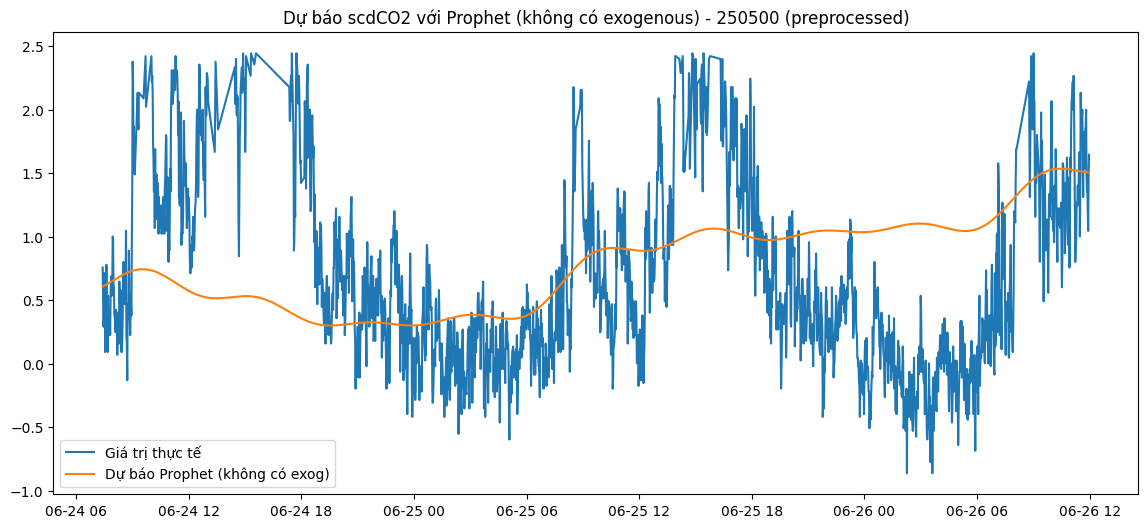


========== Prophet (không có exogenous) cho nồng độ: 500500 ==========


18:11:51 - cmdstanpy - INFO - Chain [1] start processing
18:11:51 - cmdstanpy - INFO - Chain [1] done processing


R^2: 0.5312
MAE: 0.5969
MAPE: 2447.06%
RMSE: 0.7477


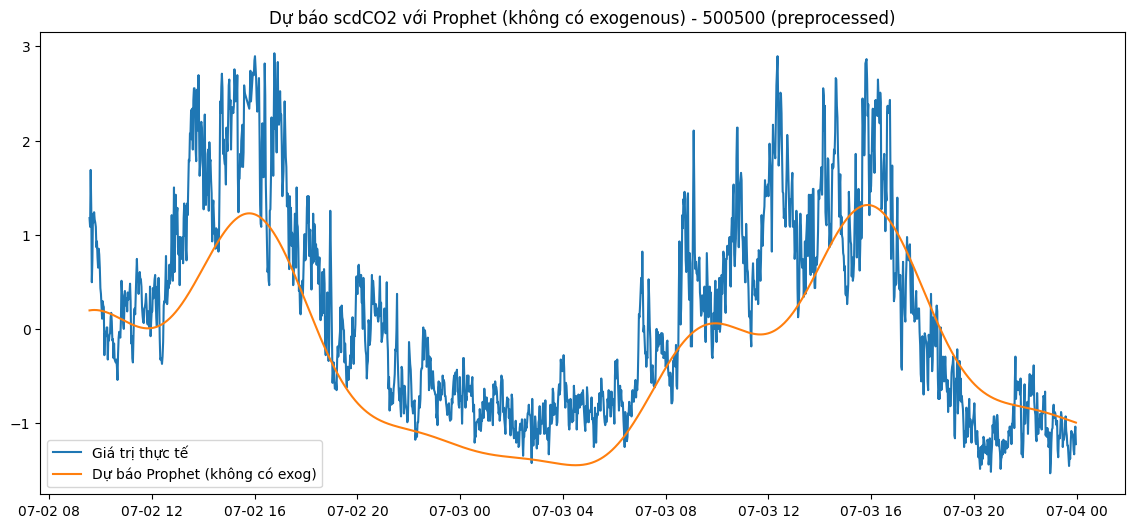


========== Prophet (không có exogenous) cho nồng độ: 750500 ==========


18:11:52 - cmdstanpy - INFO - Chain [1] start processing
18:11:54 - cmdstanpy - INFO - Chain [1] done processing


R^2: 0.4047
MAE: 0.5468
MAPE: 395.96%
RMSE: 0.6886


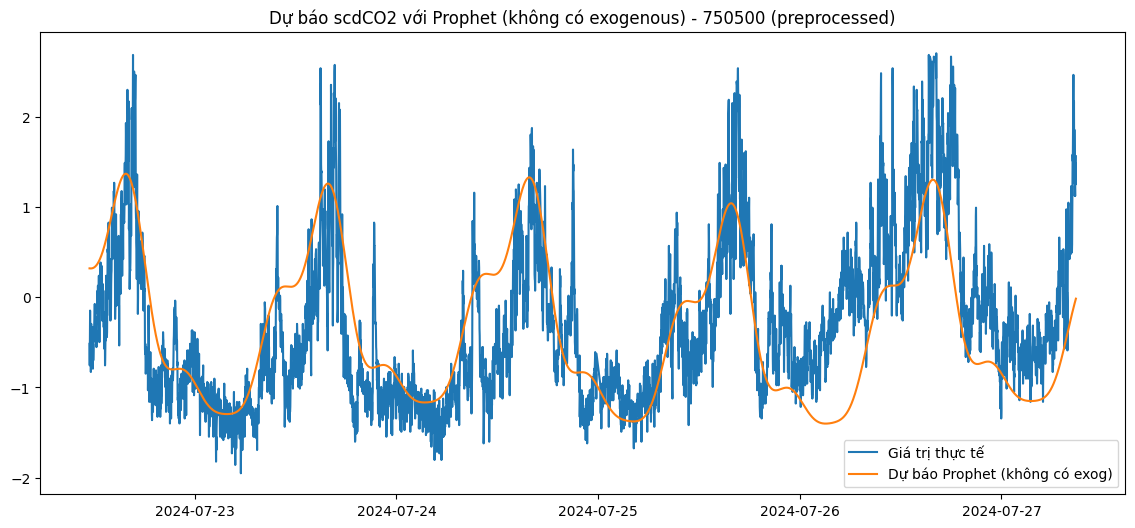


Bảng tổng hợp chỉ số các nồng độ:
  nồng độ        R2       MAE         MAPE      RMSE
0  250500 -0.127714  0.719208   511.837884  0.892942
1  500500  0.531249  0.596947  2447.060909  0.747667
2  750500  0.404654  0.546763   395.959357  0.688635


In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

base_dir = r'E:\Khóa luận\Data\Phase 2'
preprocessed_files = {
    '250500': 'preprocessed_250500.csv',
    '500500': 'preprocessed_500500.csv',
    '750500': 'preprocessed_750500.csv'
}

target_col = 'scdCO2'
# Lấy tất cả các biến trừ target và thời gian
example_file = os.path.join(base_dir, list(preprocessed_files.values())[0])
df_example = pd.read_csv(example_file, encoding="utf-8")
df_example = df_example.rename(columns=lambda x: x.strip())
exog_cols = []

metrics = []

for label, fname in preprocessed_files.items():
    print(f'\n========== Prophet (không có exogenous) cho nồng độ: {label} ==========')
    file_path = os.path.join(base_dir, fname)

    df = pd.read_csv(file_path, encoding="utf-8")
    df = df.rename(columns=lambda x: x.strip())
    if 'Date time' in df.columns:
        df['Date time'] = pd.to_datetime(df['Date time'], errors='coerce')
        df = df.sort_values('Date time').reset_index(drop=True)

    # Chuẩn hóa dữ liệu cho Prophet
    prophet_df = df[['Date time', target_col] + exog_cols].rename(columns={'Date time': 'ds', target_col: 'y'})
    prophet_df['y'] = prophet_df['y'].astype(float)
    for col in exog_cols:
        prophet_df[col] = prophet_df[col].astype(float).interpolate().bfill().ffill()
    prophet_df = prophet_df.dropna(subset=['y', 'ds'])

    # Chia train/test (80/20)
    train_size = int(len(prophet_df) * 0.8)
    train_df = prophet_df.iloc[:train_size]
    test_df = prophet_df.iloc[train_size:]

    # Khởi tạo và huấn luyện Prophet với tất cả biến ngoại sinh
    model = Prophet(yearly_seasonality=False, weekly_seasonality=True, daily_seasonality=True)
    for col in exog_cols:
        model.add_regressor(col)
    model.fit(train_df)

    # Tạo dataframe các mốc thời gian cần dự báo (bao gồm cả biến ngoại sinh)
    future = prophet_df[['ds'] + exog_cols].iloc[:len(train_df) + len(test_df)]
    forecast = model.predict(future)

    # Lấy giá trị dự báo ứng với tập test
    forecast_test = forecast.iloc[-len(test_df):]['yhat'].values
    y_test = test_df['y'].values

    # Tính các chỉ số đánh giá
    r2 = r2_score(y_test, forecast_test)
    mae = mean_absolute_error(y_test, forecast_test)
    mape = np.mean(np.abs((y_test - forecast_test) / (y_test + 1e-8))) * 100
    rmse = np.sqrt(mean_squared_error(y_test, forecast_test))

    print(f'R^2: {r2:.4f}')
    print(f'MAE: {mae:.4f}')
    print(f'MAPE: {mape:.2f}%')
    print(f'RMSE: {rmse:.4f}')

    metrics.append({
        'nồng độ': label,
        'R2': r2,
        'MAE': mae,
        'MAPE': mape,
        'RMSE': rmse
    })

    # Vẽ biểu đồ so sánh
    plt.figure(figsize=(14,6))
    plt.plot(test_df['ds'], y_test, label='Giá trị thực tế')
    plt.plot(test_df['ds'], forecast_test, label='Dự báo Prophet (không có exog)')
    plt.title(f'Dự báo {target_col} với Prophet (không có exogenous) - {label} (preprocessed)')
    plt.legend()
    plt.show()

metrics_df = pd.DataFrame(metrics)
print('\nBảng tổng hợp chỉ số các nồng độ:')
print(metrics_df)

Prophet - 3 biến ngoại sinh mạnh nhất (ccseCO2, scdTEMP, scdHUMID)


========== Prophet (3 exogenous: ccseCO2, scdTEMP, scdHUMID) cho nồng độ: 250500 ==========


18:12:00 - cmdstanpy - INFO - Chain [1] start processing
18:12:02 - cmdstanpy - INFO - Chain [1] done processing


R^2: -0.4388
MAE: 0.7926
MAPE: 244.46%
RMSE: 1.0086


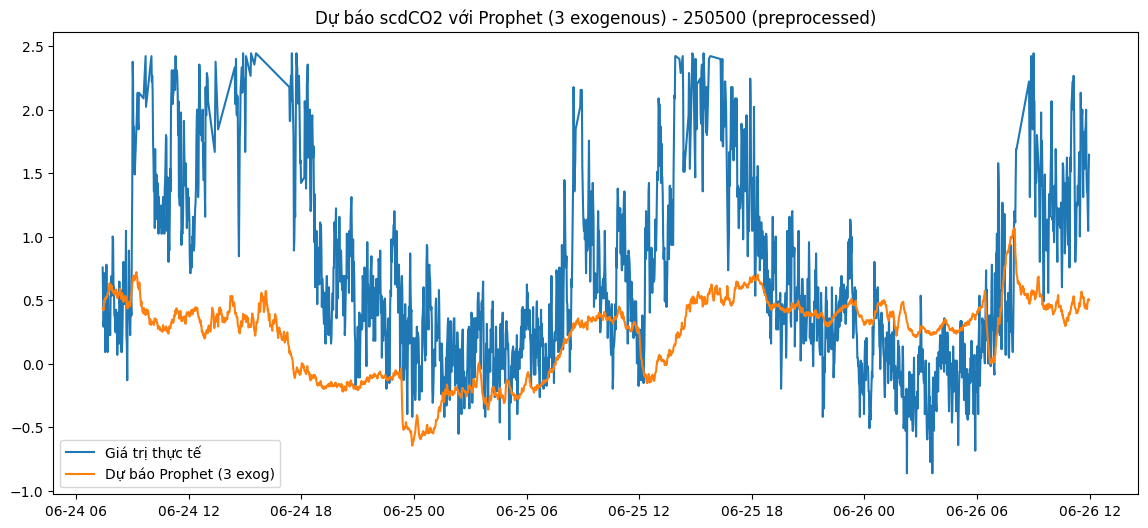


========== Prophet (3 exogenous: ccseCO2, scdTEMP, scdHUMID) cho nồng độ: 500500 ==========


18:12:03 - cmdstanpy - INFO - Chain [1] start processing
18:12:04 - cmdstanpy - INFO - Chain [1] done processing


R^2: 0.0547
MAE: 0.9005
MAPE: 3287.20%
RMSE: 1.0617


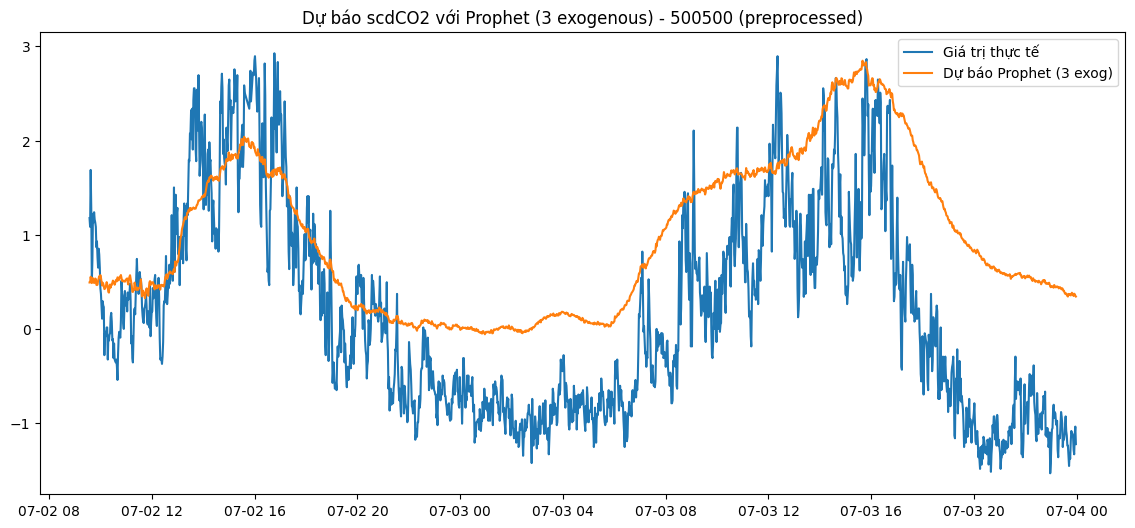


========== Prophet (3 exogenous: ccseCO2, scdTEMP, scdHUMID) cho nồng độ: 750500 ==========


18:12:05 - cmdstanpy - INFO - Chain [1] start processing
18:12:08 - cmdstanpy - INFO - Chain [1] done processing


R^2: 0.5762
MAE: 0.4527
MAPE: 327.95%
RMSE: 0.5810


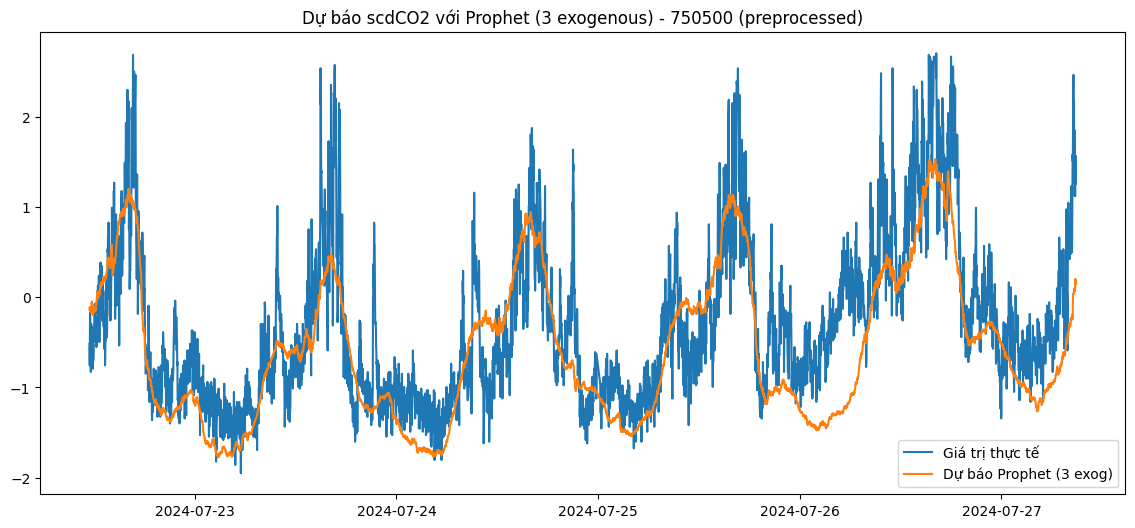


Bảng tổng hợp chỉ số các nồng độ:
  nồng độ        R2       MAE         MAPE      RMSE
0  250500 -0.438763  0.792622   244.461468  1.008599
1  500500  0.054749  0.900469  3287.195284  1.061721
2  750500  0.576249  0.452661   327.951727  0.580979


In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

base_dir = r'E:\Khóa luận\Data\Phase 2'
preprocessed_files = {
    '250500': 'preprocessed_250500.csv',
    '500500': 'preprocessed_500500.csv',
    '750500': 'preprocessed_750500.csv'
}

target_col = 'scdCO2'
exog_cols = ['ccseCO2', 'scdTEMP', 'scdHUMID']
metrics = []

for label, fname in preprocessed_files.items():
    print(f'\n========== Prophet (3 exogenous: ccseCO2, scdTEMP, scdHUMID) cho nồng độ: {label} ==========')
    file_path = os.path.join(base_dir, fname)

    df = pd.read_csv(file_path, encoding="utf-8")
    df = df.rename(columns=lambda x: x.strip())
    if 'Date time' in df.columns:
        df['Date time'] = pd.to_datetime(df['Date time'], errors='coerce')
        df = df.sort_values('Date time').reset_index(drop=True)

    # Chuẩn hóa dữ liệu cho Prophet
    prophet_df = df[['Date time', target_col] + exog_cols].rename(columns={'Date time': 'ds', target_col: 'y'})
    prophet_df['y'] = prophet_df['y'].astype(float)
    for col in exog_cols:
        prophet_df[col] = prophet_df[col].astype(float).interpolate().bfill().ffill()
    prophet_df = prophet_df.dropna(subset=['y', 'ds'])

    # Chia train/test (80/20)
    train_size = int(len(prophet_df) * 0.8)
    train_df = prophet_df.iloc[:train_size]
    test_df = prophet_df.iloc[train_size:]

    # Khởi tạo và huấn luyện Prophet với các biến ngoại sinh
    model = Prophet(yearly_seasonality=False, weekly_seasonality=True, daily_seasonality=True)
    for col in exog_cols:
        model.add_regressor(col)
    model.fit(train_df)

    # Tạo dataframe các mốc thời gian cần dự báo (bao gồm cả biến ngoại sinh)
    future = prophet_df[['ds'] + exog_cols].iloc[:len(train_df) + len(test_df)]
    forecast = model.predict(future)

    # Lấy giá trị dự báo ứng với tập test
    forecast_test = forecast.iloc[-len(test_df):]['yhat'].values
    y_test = test_df['y'].values

    # Tính các chỉ số đánh giá
    r2 = r2_score(y_test, forecast_test)
    mae = mean_absolute_error(y_test, forecast_test)
    mape = np.mean(np.abs((y_test - forecast_test) / (y_test + 1e-8))) * 100
    rmse = np.sqrt(mean_squared_error(y_test, forecast_test))

    print(f'R^2: {r2:.4f}')
    print(f'MAE: {mae:.4f}')
    print(f'MAPE: {mape:.2f}%')
    print(f'RMSE: {rmse:.4f}')

    metrics.append({
        'nồng độ': label,
        'R2': r2,
        'MAE': mae,
        'MAPE': mape,
        'RMSE': rmse
    })

    # Vẽ biểu đồ so sánh
    plt.figure(figsize=(14,6))
    plt.plot(test_df['ds'], y_test, label='Giá trị thực tế')
    plt.plot(test_df['ds'], forecast_test, label='Dự báo Prophet (3 exog)')
    plt.title(f'Dự báo {target_col} với Prophet (3 exogenous) - {label} (preprocessed)')
    plt.legend()
    plt.show()

metrics_df = pd.DataFrame(metrics)
print('\nBảng tổng hợp chỉ số các nồng độ:')
print(metrics_df)

Prophet - toàn bộ biến ngoại sinh


========== Prophet (all exogenous) cho nồng độ: 250500 ==========


18:12:13 - cmdstanpy - INFO - Chain [1] start processing
18:12:15 - cmdstanpy - INFO - Chain [1] done processing


R^2: 0.0965
MAE: 0.6153
MAPE: 252.35%
RMSE: 0.7992


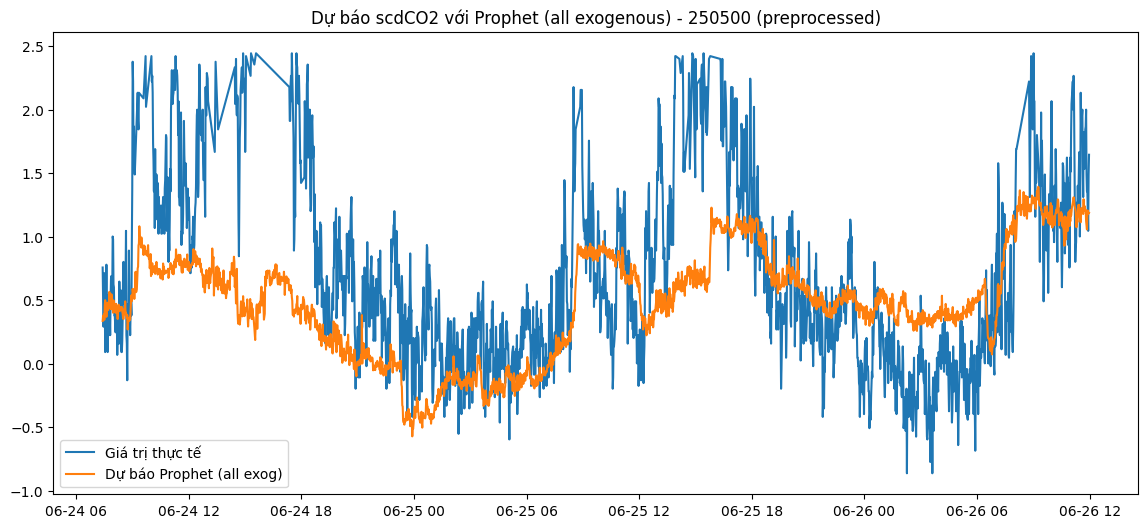


========== Prophet (all exogenous) cho nồng độ: 500500 ==========


18:12:17 - cmdstanpy - INFO - Chain [1] start processing
18:12:17 - cmdstanpy - INFO - Chain [1] done processing


R^2: 0.0042
MAE: 0.9201
MAPE: 3211.86%
RMSE: 1.0897


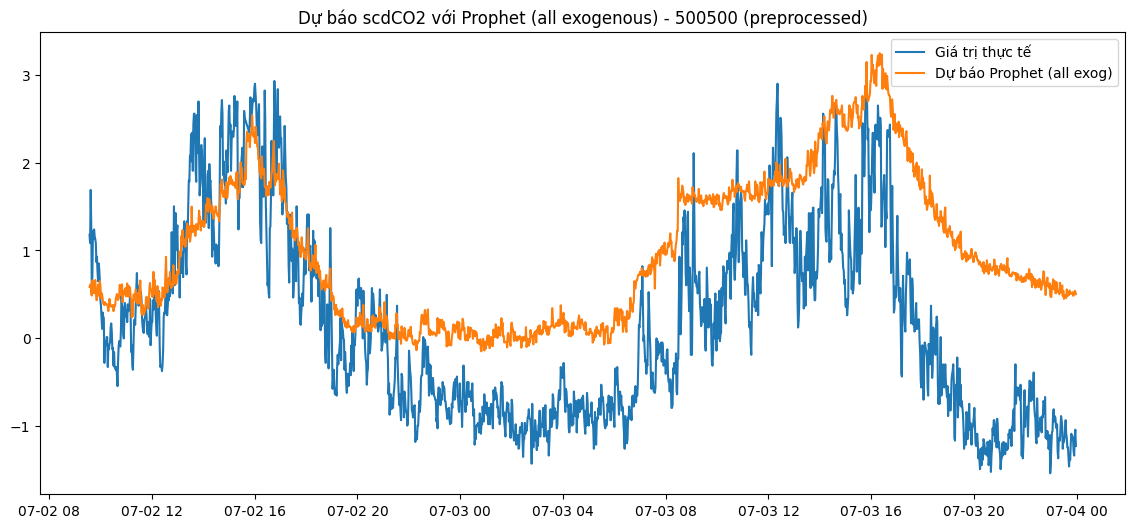


========== Prophet (all exogenous) cho nồng độ: 750500 ==========


18:12:19 - cmdstanpy - INFO - Chain [1] start processing
18:12:20 - cmdstanpy - INFO - Chain [1] done processing


R^2: 0.7071
MAE: 0.3773
MAPE: 244.95%
RMSE: 0.4830


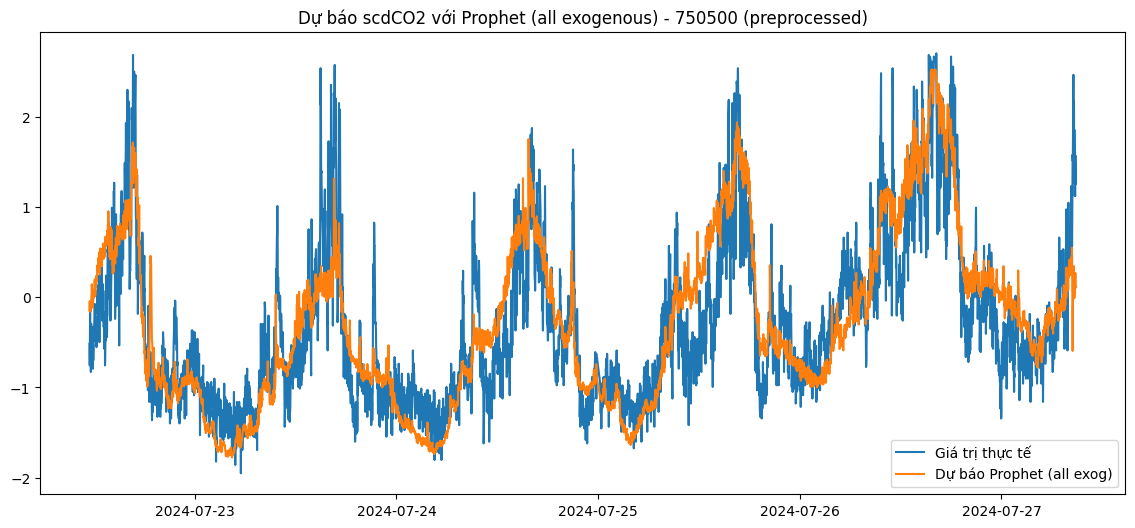


Bảng tổng hợp chỉ số các nồng độ:
  nồng độ        R2       MAE         MAPE      RMSE
0  250500  0.096549  0.615275   252.351919  0.799238
1  500500  0.004205  0.920084  3211.863865  1.089737
2  750500  0.707099  0.377339   244.951116  0.483020


In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

base_dir = r'E:\Khóa luận\Data\Phase 2'
preprocessed_files = {
    '250500': 'preprocessed_250500.csv',
    '500500': 'preprocessed_500500.csv',
    '750500': 'preprocessed_750500.csv'
}

target_col = 'scdCO2'
# Lấy tất cả các biến trừ target và thời gian
example_file = os.path.join(base_dir, list(preprocessed_files.values())[0])
df_example = pd.read_csv(example_file, encoding="utf-8")
df_example = df_example.rename(columns=lambda x: x.strip())
all_cols = df_example.columns.tolist()
exog_cols = ['ccseCO2', 'scdTEMP', 'scdHUMID', 'H2S_boardtemp', 'NH3_concentration', 'NH3_boardtemp', 'CH4RAWppm']

metrics = []

for label, fname in preprocessed_files.items():
    print(f'\n========== Prophet (all exogenous) cho nồng độ: {label} ==========')
    file_path = os.path.join(base_dir, fname)

    df = pd.read_csv(file_path, encoding="utf-8")
    df = df.rename(columns=lambda x: x.strip())
    if 'Date time' in df.columns:
        df['Date time'] = pd.to_datetime(df['Date time'], errors='coerce')
        df = df.sort_values('Date time').reset_index(drop=True)

    # Chuẩn hóa dữ liệu cho Prophet
    prophet_df = df[['Date time', target_col] + exog_cols].rename(columns={'Date time': 'ds', target_col: 'y'})
    prophet_df['y'] = prophet_df['y'].astype(float)
    for col in exog_cols:
        prophet_df[col] = prophet_df[col].astype(float).interpolate().bfill().ffill()
    prophet_df = prophet_df.dropna(subset=['y', 'ds'])

    # Chia train/test (80/20)
    train_size = int(len(prophet_df) * 0.8)
    train_df = prophet_df.iloc[:train_size]
    test_df = prophet_df.iloc[train_size:]

    # Khởi tạo và huấn luyện Prophet với tất cả biến ngoại sinh
    model = Prophet(yearly_seasonality=False, weekly_seasonality=True, daily_seasonality=True)
    for col in exog_cols:
        model.add_regressor(col)
    model.fit(train_df)

    # Tạo dataframe các mốc thời gian cần dự báo (bao gồm cả biến ngoại sinh)
    future = prophet_df[['ds'] + exog_cols].iloc[:len(train_df) + len(test_df)]
    forecast = model.predict(future)

    # Lấy giá trị dự báo ứng với tập test
    forecast_test = forecast.iloc[-len(test_df):]['yhat'].values
    y_test = test_df['y'].values

    # Tính các chỉ số đánh giá
    r2 = r2_score(y_test, forecast_test)
    mae = mean_absolute_error(y_test, forecast_test)
    mape = np.mean(np.abs((y_test - forecast_test) / (y_test + 1e-8))) * 100
    rmse = np.sqrt(mean_squared_error(y_test, forecast_test))

    print(f'R^2: {r2:.4f}')
    print(f'MAE: {mae:.4f}')
    print(f'MAPE: {mape:.2f}%')
    print(f'RMSE: {rmse:.4f}')

    metrics.append({
        'nồng độ': label,
        'R2': r2,
        'MAE': mae,
        'MAPE': mape,
        'RMSE': rmse
    })

    # Vẽ biểu đồ so sánh
    plt.figure(figsize=(14,6))
    plt.plot(test_df['ds'], y_test, label='Giá trị thực tế')
    plt.plot(test_df['ds'], forecast_test, label='Dự báo Prophet (all exog)')
    plt.title(f'Dự báo {target_col} với Prophet (all exogenous) - {label} (preprocessed)')
    plt.legend()
    plt.show()

metrics_df = pd.DataFrame(metrics)
print('\nBảng tổng hợp chỉ số các nồng độ:')
print(metrics_df)